# Day 25: Snowverload

Still somehow without snow, you go to the last place you haven't checked: the center of Snow Island, directly below the waterfall.

Here, someone has clearly been trying to fix the problem. Scattered everywhere are hundreds of weather machines, almanacs, communication modules, hoof prints, machine parts, mirrors, lenses, and so on.

Somehow, everything has been wired together into a massive snow-producing apparatus, but nothing seems to be running. You check a tiny screen on one of the communication modules: Error 2023. It doesn't say what Error 2023 means, but it does have the phone number for a support line printed on it.

"Hi, you've reached Weather Machines And So On, Inc. How can I help you?" You explain the situation.

"Error 2023, you say? Why, that's a power overload error, of course! It means you have too many components plugged in. Try unplugging some components and--" You explain that there are hundreds of components here and you're in a bit of a hurry.

"Well, let's see how bad it is; do you see a big red reset button somewhere? It should be on its own module. If you push it, it probably won't fix anything, but it'll report how overloaded things are." After a minute or two, you find the reset button; it's so big that it takes two hands just to get enough leverage to push it. Its screen then displays:

SYSTEM OVERLOAD!

Connected components would require
power equal to at least 100 stars!
"Wait, how many components did you say are plugged in? With that much equipment, you could produce snow for an entire--" You disconnect the call.

You have nowhere near that many stars - you need to find a way to disconnect at least half of the equipment here, but it's already Christmas! You only have time to disconnect three wires.

Fortunately, someone left a wiring diagram (your puzzle input) that shows how the components are connected. For example:

    jqt: rhn xhk nvd
    rsh: frs pzl lsr
    xhk: hfx
    cmg: qnr nvd lhk bvb
    rhn: xhk bvb hfx
    bvb: xhk hfx
    pzl: lsr hfx nvd
    qnr: nvd
    ntq: jqt hfx bvb xhk
    nvd: lhk
    lsr: lhk
    rzs: qnr cmg lsr rsh
    frs: qnr lhk lsr
    
Each line shows the name of a component, a colon, and then a list of other components to which that component is connected. Connections aren't directional; abc: xyz and xyz: abc both represent the same configuration. Each connection between two components is represented only once, so some components might only ever appear on the left or right side of a colon.

In this example, if you disconnect the wire between hfx/pzl, the wire between bvb/cmg, and the wire between nvd/jqt, you will divide the components into two separate, disconnected groups:

    9 components: cmg, frs, lhk, lsr, nvd, pzl, qnr, rsh, and rzs.
    6 components: bvb, hfx, jqt, ntq, rhn, and xhk.
    
Multiplying the sizes of these groups together produces 54.

Find the three wires you need to disconnect in order to divide the components into two separate groups. What do you get if you multiply the sizes of these two groups together?

Community 1 has 786 nodes
Community 2 has 707 nodes


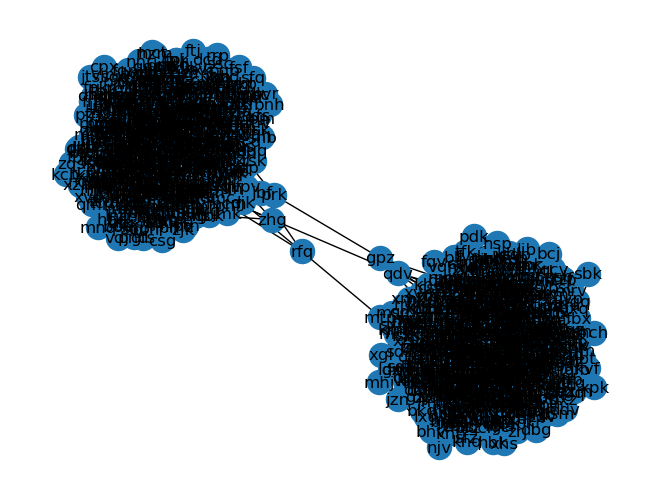

In [64]:
import networkx as nx

# Create a new graph
G = nx.Graph()

# Open the file in read mode
file = open("input_25.txt")
sol = 1

for n, data in enumerate(file):

    line = data.split(":")
    # Define nodes and connections
    nodes = line[0].strip()
    conn_nodes = [n.strip() for n in line[1].split()]

    # Add edges between the node and connected nodes
    for node in conn_nodes:
        G.add_edge(nodes, node)

# Visualize the graph
nx.draw(G, with_labels=True)

# Let's use the Louvain method as an example:
communities = nx.algorithms.community.greedy_modularity_communities(G, best_n=2)

# Print the communities found
for i, community in enumerate(communities):
    # # Sort the nodes alphabetically
    # sorted_community = sorted(list(community))  
    # print(f"Community {i+1}: {sorted_community}")
    # Count number of nodes in each community
    sol *= len(community)
    print(f"Community {i+1} has {len(community)} nodes")

print(f"Solution is {sol}")